# 参数相关的方法
## 读取保存模型
### 读取模型
model.load_weights(path) 读取模型
### 保存模型
keras.callbacks.ModelCheckpoint(file_path, save_weight_only, save_best_only) 保存模型
history = model.fit(callbacks)

## 提取可训练的参数
model.trainable_variables 返回模型中可训练的参数

In [29]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from keras import Model
from tensorflow.keras import Model
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # 使用 GPU 1
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0],True)
logical_devices = tf.config.list_logical_devices("GPU")

In [2]:
# 加载数据
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 使用class形式进行构建

class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = keras.layers.Flatten()
        self.d1 = keras.layers.Dense(units=128, activation='relu')
        self.d2 = keras.layers.Dense(units=10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y
model = MnistModel()

In [4]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), # 由于是softmax概率和int label的loss 所以使用SparseCategoricalCrossentropy
    metrics=['sparse_categorical_accuracy']
)

In [5]:
# fit部分
model.fit(x_train,y_train,batch_size=64,epochs=2, validation_data=(x_test, y_test), validation_freq=1)

Epoch 1/2
938/938 [==============================] - 4s 3ms/step - loss: 3.3171 - sparse_categorical_accuracy: 0.8715 - val_loss: 0.6656 - val_sparse_categorical_accuracy: 0.8904
Epoch 2/2
938/938 [==============================] - 3s 3ms/step - loss: 0.4633 - sparse_categorical_accuracy: 0.9099 - val_loss: 0.4396 - val_sparse_categorical_accuracy: 0.9112


In [37]:
# 模型保存部分 先初始化一个ModelCheckpoint
cp_callback = keras.callbacks.ModelCheckpoint(
    filepath='tensorflow_study/chapter4/model_dir/checkpoint', # 写到ckpt
    save_weights_only=True,
    save_best_only=True,
)

In [38]:
# 模型保存部分 fit显示指定参数进行保存

history = model.fit(x_train,y_train,batch_size=64,epochs=50, validation_data=(x_test, y_test), validation_freq=1, callbacks=[cp_callback])

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0816 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.7196 - val_sparse_categorical_accuracy: 0.9591
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0695 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.7562 - val_sparse_categorical_accuracy: 0.9606
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0726 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.7873 - val_sparse_categorical_accuracy: 0.9622
Epoch 4/50
938/938 [==============================] - 2s 3ms/step - loss: 0.0639 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.8809 - val_sparse_categorical_accuracy: 0.9605
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0777 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.7238 - val_sparse_categorical_accuracy: 0.9627
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0673 - sparse_categorica

In [16]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  100480    
                                                                 
 dense_1 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 模型加载部分

new_model = MnistModel()
new_model.load_weights(filepath='tensorflow_study/chapter4/model_dir/checkpoint')

In [18]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  100480    
                                                                 
 dense_1 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 模型中可训练的参数 打印输出
print(model.trainable_variables)

[<tf.Variable 'mnist_model/dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[-0.06804021,  0.06845944,  0.06325255, ..., -0.06439033,
         0.01519375, -0.03003025],
       [ 0.05098697, -0.02337443,  0.04462608, ..., -0.06401289,
        -0.03205321,  0.02447786],
       [ 0.0192793 , -0.00463922, -0.07335889, ..., -0.06868324,
        -0.06585754,  0.03268439],
       ...,
       [ 0.005555  , -0.07812948, -0.0238303 , ..., -0.00271643,
         0.06927776, -0.00894482],
       [-0.01793958,  0.07842129, -0.03389555, ...,  0.04951661,
         0.05493011,  0.07648245],
       [-0.03590082, -0.05741236, -0.02712338, ..., -0.02961496,
         0.05892631, -0.05262154]], dtype=float32)>, <tf.Variable 'mnist_model/dense/bias:0' shape=(128,) dtype=float32, numpy=
array([-0.22209391, -0.03093714, -0.04372641, -0.01229542, -0.04048825,
       -0.08444995, -0.03090841, -0.18622632, -0.02745413, -0.04130884,
       -0.11658695, -0.02747517, -0.03880059, -0.02832391, -0.0464979

In [20]:
# 持久化保存模型的所有参数为txt
with open('tensorflow_study/chapter4/model_dir/weights.txt', 'w') as file:
    for v in model.trainable_variables:
        file.write(str(v.name) + '\n')
        file.write(str(v.shape) + '\n')
        file.write(str(v.numpy()) + '\n')
# 这是有省略号的 并没有看到所有参数

In [21]:
# 设置都输出
np.set_printoptions(threshold=np.inf)
print(model.trainable_variables)

[<tf.Variable 'mnist_model/dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[-6.80402070e-02,  6.84594437e-02,  6.32525459e-02,
         2.89129838e-02, -4.83782962e-02, -7.33446777e-02,
         3.23649272e-02, -1.30790696e-02,  4.36766297e-02,
         8.10704380e-03,  4.21315804e-02, -5.93520850e-02,
        -3.78149003e-03,  1.86355859e-02,  6.12579286e-04,
        -2.97117904e-02,  3.42196450e-02,  1.60806105e-02,
        -1.80067793e-02, -7.14043528e-02,  5.50954565e-02,
        -4.63123843e-02,  7.65631869e-02,  6.56618848e-02,
        -2.10049525e-02,  4.27806899e-02, -4.00563888e-02,
         3.29087973e-02, -7.96697363e-02, -6.67807385e-02,
        -7.39216208e-02, -7.79654309e-02,  7.12648705e-02,
         7.67254829e-03,  4.35238630e-02, -1.41735822e-02,
        -5.48909530e-02, -2.92027853e-02,  5.85328713e-02,
        -2.21467428e-02,  9.80380177e-03, -4.93080169e-03,
        -1.40253752e-02,  3.65467370e-02,  2.26207227e-02,
         2.89152414e-02,  5.92610

In [22]:
# 持久化保存模型的所有参数为txt 不带省略号
with open('tensorflow_study/chapter4/model_dir/weights_plus.txt', 'w') as file:
    for v in model.trainable_variables:
        file.write(str(v.name) + '\n')
        file.write(str(v.shape) + '\n')
        file.write(str(v.numpy()) + '\n')

In [24]:
history.history

{'loss': [0.12724453210830688,
  0.11884815990924835,
  0.1140613928437233,
  0.11751744896173477,
  0.11140786856412888],
 'sparse_categorical_accuracy': [0.9678333401679993,
  0.9700333476066589,
  0.9720166921615601,
  0.9705166816711426,
  0.9725333452224731],
 'val_loss': [0.2732316553592682,
  0.2483164519071579,
  0.2521391212940216,
  0.22656138241291046,
  0.2628784477710724],
 'val_sparse_categorical_accuracy': [0.9514999985694885,
  0.9546999931335449,
  0.953499972820282,
  0.958299994468689,
  0.9596999883651733]}

In [26]:
print(type(history.history))
print(history.history.keys())

<class 'dict'>
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


In [34]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

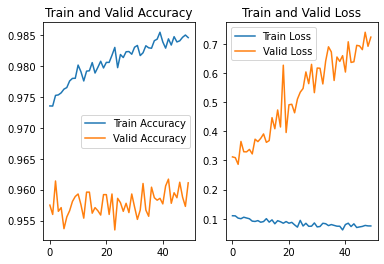

In [35]:
plt.subplot(1,2,1)
plt.plot(acc, label = 'Train Accuracy')
plt.plot(val_acc, label = 'Valid Accuracy')
plt.title('Train and Valid Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label = 'Train Loss')
plt.plot(val_loss, label = 'Valid Loss')
plt.title('Train and Valid Loss')
plt.legend()
plt.show()